In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import collections

In [ ]:
train = pd.read_csv('/content/cs-training.csv')
test = pd.read_csv('/content/cs-test.csv')
sample = pd.read_csv('/content/sampleEntry.csv')


In [ ]:
train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,2,0.0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,3,0.0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,4,0.0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,5,0.0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42036,42037,0.0,0.692735,29.0,0.0,0.190219,3700.0,5.0,0.0,0.0,0.0,0.0
42037,42038,0.0,0.237660,68.0,0.0,0.196701,4000.0,9.0,0.0,1.0,0.0,0.0
42038,42039,0.0,0.000876,54.0,0.0,0.000092,10933.0,4.0,0.0,0.0,0.0,1.0
42039,42040,0.0,0.000000,39.0,0.0,0.355974,11056.0,7.0,0.0,2.0,0.0,2.0


In [ ]:
# Naming unamed features
train.rename(columns = {'Unnamed: 0':'ID'} , inplace = True)
train.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,2,0.0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,3,0.0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,4,0.0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,5,0.0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [ ]:
# Converting every Feature in small letter

train.columns = train.columns.str.lower()

In [ ]:
# Replacing - 
AllColumns = [ column for column in train.columns ]
for c in AllColumns:
    if '-' in c:
        index = c.index('-')
        splitted = c[0:index] + c[index+1:len(c)]
        train.rename({c:splitted} , inplace = True)
        print(splitted)

numberoftime3059dayspastduenotworse
numberoftime6089dayspastduenotworse


In [ ]:
train.drop('id' , inplace = True , axis = 1)
train.describe()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
count,42040.000000,42040.000000,42040.000000,42040.000000,42040.000000,33590.000000,42040.000000,42040.000000,42040.000000,42040.000000,40909.000000
mean,0.066365,5.487089,52.278235,0.424952,362.118183,6623.244507,8.410442,0.274405,1.017531,0.246931,0.757828
std,0.248923,237.502785,14.805452,4.262641,2187.453550,8265.510515,5.124754,4.239574,1.129647,4.226169,1.118633
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030024,41.000000,0.000000,0.174878,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.157490,52.000000,0.000000,0.368889,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.564695,63.000000,0.000000,0.880248,8266.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,29110.000000,107.000000,98.000000,326442.000000,629000.000000,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
# Checking the distribution of our target 
percentile = train['seriousdlqin2yrs'].value_counts()/len(train)*100

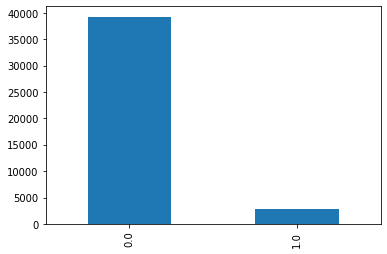

In [ ]:
train.seriousdlqin2yrs.value_counts().plot(kind = 'bar')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


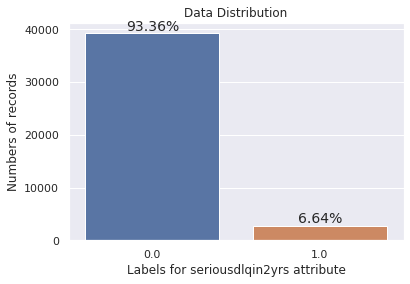

In [ ]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(train.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/len(train))),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()


### Missing values

In [ ]:
train.isna().sum()

seriousdlqin2yrs                           1
revolvingutilizationofunsecuredlines       1
age                                        1
numberoftime30-59dayspastduenotworse       1
debtratio                                  1
monthlyincome                           8451
numberofopencreditlinesandloans            1
numberoftimes90dayslate                    1
numberrealestateloansorlines               1
numberoftime60-89dayspastduenotworse       1
numberofdependents                      1132
dtype: int64

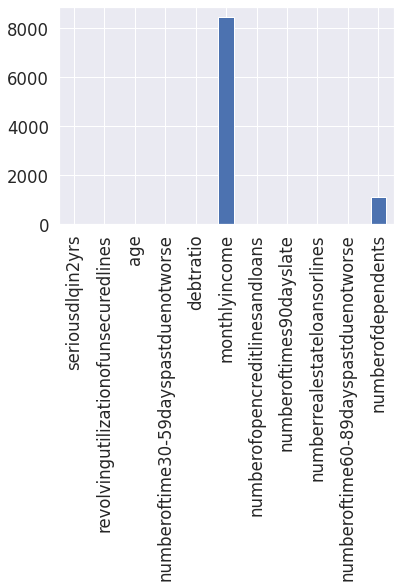

In [ ]:
train.isna().sum().plot(kind ='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

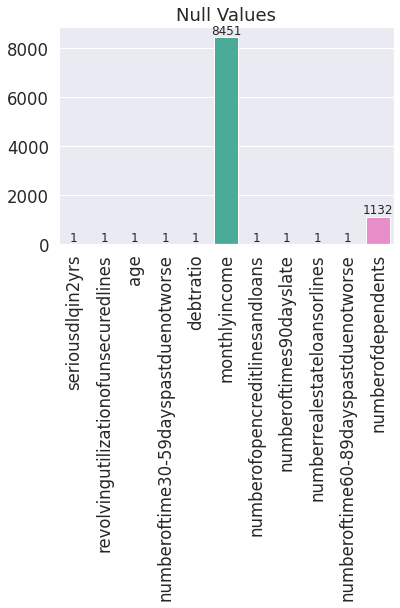

In [ ]:
# Or
sns.barplot(train.columns , train.isnull().sum()).set_title('Null Values')
ax = plt.gca()
for a in ax.patches:
    height = a.get_height()
    ax.text(a.get_x() + a.get_width()/2. , height+ 1 , int(height),fontsize = 12 , ha='center', va='bottom')
plt.xticks(rotation = 90)


In [ ]:
train.fillna((train.mean()) , inplace = True)

In [ ]:
train.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime30-59dayspastduenotworse    0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime60-89dayspastduenotworse    0
numberofdependents                      0
dtype: int64

### Correlation

In [ ]:
train.corr()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
seriousdlqin2yrs,1.000000,-0.000610,-0.114524,0.113177,-0.008904,-0.030001,-0.031852,0.105791,-0.013189,0.091512,0.039259
revolvingutilizationofunsecuredlines,-0.000610,1.000000,-0.004997,-0.001254,0.001453,0.004385,-0.008731,-0.000934,0.004614,-0.000998,-0.004547
age,-0.114524,-0.004997,1.000000,-0.067325,0.026439,0.061255,0.157237,-0.065969,0.037090,-0.062337,-0.203468
numberoftime30-59dayspastduenotworse,0.113177,-0.001254,-0.067325,1.000000,-0.007128,-0.015006,-0.055987,0.984560,-0.031577,0.987572,-0.008035
debtratio,-0.008904,0.001453,0.026439,-0.007128,1.000000,-0.009424,0.042581,-0.008050,0.100188,-0.007126,-0.037621
monthlyincome,-0.030001,0.004385,0.061255,-0.015006,-0.009424,1.000000,0.137950,-0.018028,0.178130,-0.016542,0.089601
numberofopencreditlinesandloans,-0.031852,-0.008731,0.157237,-0.055987,0.042581,0.137950,1.000000,-0.080787,0.434808,-0.071948,0.063348
numberoftimes90dayslate,0.105791,-0.000934,-0.065969,0.984560,-0.008050,-0.018028,-0.080787,1.000000,-0.045900,0.993531,-0.014827
numberrealestateloansorlines,-0.013189,0.004614,0.037090,-0.031577,0.100188,0.178130,0.434808,-0.045900,1.000000,-0.039861,0.120610
numberoftime60-89dayspastduenotworse,0.091512,-0.000998,-0.062337,0.987572,-0.007126,-0.016542,-0.071948,0.993531,-0.039861,1.000000,-0.015737


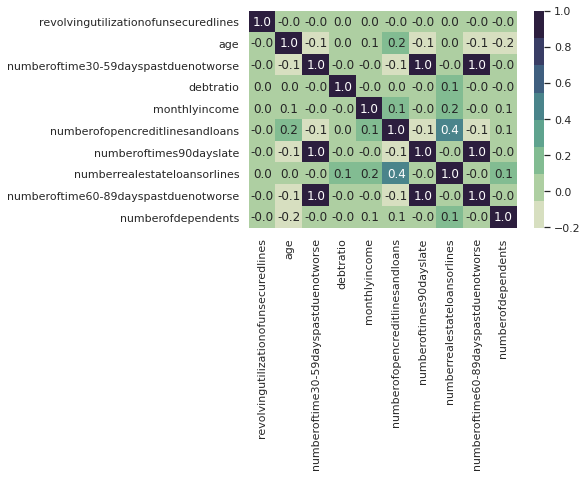

In [ ]:
sns.set()
sns.heatmap(train[train.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)) )
plt.show()

### Outliers Detection

In [ ]:
# Percentile Outlier Detection
#percentile_based_outlier(data=training_data.revolvingutilizationofunsecuredlines)

# Another percentile based outlier detection method which is based on inter quertile(IQR) range
# import numpy as np
# def outliers_iqr(ys):
#     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))
def percentile_based_outlier( data , threshold = 95):
    threshold1 = (100 - 95)/2.0
    minval , maxval = np.percentile(data , [threshold1 , threshold] )
    return ((data < minval) | (data > maxval))
    

In [ ]:
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold
#mad_based_outlier(points=training_data.age)

In [ ]:
# Standard Deviation method
def std_div( data , threshold = 3 ):
    isOutlier = []
    sd = data.std()
    for dataa in data:
        if dataa/sd > 3 :
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

In [ ]:
# Now if max any 2 of these technique result in True(Outlier) result will be True
def outlierVote( data ):
    x = percentile_based_outlier( data )
    y = mad_based_outlier( data )
    z = std_div(data)
    temp = zip(data.index, x, y, z)
    final = []
    for i in range(temp.shape[0]):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

In [ ]:
train.columns

Index(['seriousdlqin2yrs', 'revolvingutilizationofunsecuredlines', 'age',
       'numberoftime30-59dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime60-89dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

## Fixing Outliers

In [ ]:
import collections
collections.Counter(train.revolvingutilizationofunsecuredlines)

Counter({0.7661266090000001: 1,
         0.9571510190000001: 1,
         0.65818014: 1,
         0.23380977600000002: 1,
         0.9072394: 1,
         0.21317868199999998: 1,
         0.305682465: 1,
         0.754463648: 1,
         0.116950644: 1,
         0.189169052: 1,
         0.644225962: 1,
         0.01879812: 2,
         0.010351856999999999: 1,
         0.964672555: 1,
         0.019656581: 1,
         0.548458062: 1,
         0.061086117999999995: 1,
         0.166284079: 1,
         0.22181277100000002: 1,
         0.602794411: 1,
         0.20092338199999998: 1,
         0.025655677: 1,
         0.9999998999999999: 3028,
         0.075426584: 1,
         0.04656027: 1,
         0.392248482: 1,
         0.052436094: 1,
         0.034421473: 1,
         0.45251582799999995: 1,
         0.39299458600000003: 1,
         0.704073982: 1,
         0.083418009: 1,
         0.18686855600000002: 1,
         0.6933296809999999: 1,
         0.0: 3054,
         0.881836362: 1,
     

In [ ]:
val = []
for data in train.revolvingutilizationofunsecuredlines:
    if data <= 0.99999:
        val.append(data)
    else:
        val.append(0.99999)
train.revolvingutilizationofunsecuredlines = val    

In [ ]:
collections.Counter(train.age)

Counter({21.0: 60,
         22.0: 135,
         23.0: 188,
         24.0: 238,
         25.0: 263,
         26.0: 344,
         27.0: 384,
         28.0: 454,
         29.0: 480,
         30.0: 465,
         31.0: 568,
         32.0: 583,
         33.0: 629,
         34.0: 597,
         35.0: 611,
         36.0: 678,
         37.0: 719,
         38.0: 740,
         39.0: 829,
         40.0: 875,
         41.0: 916,
         42.0: 847,
         43.0: 872,
         44.0: 912,
         45.0: 996,
         46.0: 1110,
         47.0: 1070,
         48.0: 1090,
         49.0: 1052,
         50.0: 1007,
         51.0: 1001,
         52.0: 981,
         52.27823501427212: 1,
         53.0: 995,
         54.0: 1033,
         55.0: 994,
         56.0: 992,
         57.0: 924,
         58.0: 986,
         59.0: 924,
         60.0: 906,
         61.0: 1009,
         62.0: 963,
         63.0: 1032,
         64.0: 827,
         65.0: 727,
         66.0: 694,
         67.0: 676,
         68.0: 653,
 

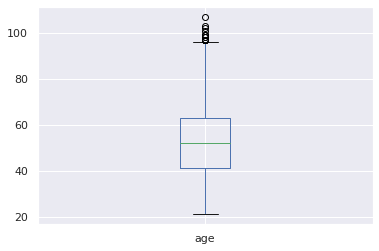

In [ ]:
train.age.plot.box()

In [ ]:
val = []
for data in train.age:
    if data >= 21 :
        val.append(data)
    else:
        val.append(21)
train.age = val  

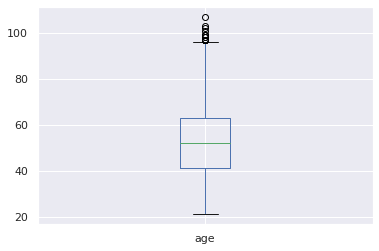

In [ ]:
train.age.plot.box()

In [ ]:
collections.Counter(train['numberoftime30-59dayspastduenotworse'])

Counter({0.0: 35330,
         0.42495242626070406: 1,
         1.0: 4555,
         2.0: 1211,
         3.0: 500,
         4.0: 207,
         5.0: 85,
         6.0: 48,
         7.0: 14,
         8.0: 6,
         9.0: 3,
         10.0: 2,
         12.0: 1,
         96.0: 1,
         98.0: 77})

In [ ]:
med = train['numberoftime30-59dayspastduenotworse'].median()
val = []
for data in train['numberoftime30-59dayspastduenotworse']:
    if data != 98 and data != 96 :
        val.append(data)
    else:
        val.append(med)
train['numberoftime30-59dayspastduenotworse'] = val  

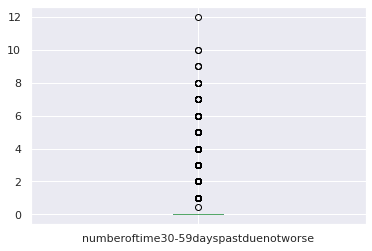

In [ ]:
train['numberoftime30-59dayspastduenotworse'].plot.box()

In [ ]:
collections.Counter(train.numberofdependents)

Counter({0.0: 24328,
         0.7578283507296683: 1132,
         1.0: 7410,
         2.0: 5384,
         3.0: 2722,
         4.0: 794,
         5.0: 203,
         6.0: 42,
         7.0: 13,
         8.0: 8,
         10.0: 4,
         20.0: 1})

In [ ]:
depNew = []
for var in train.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)
train.numberofdependetns = depNew

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [ ]:
collections.Counter(train['numberoftime60-89dayspastduenotworse'])
new = removeSpecificAndPutMedian(train['numberoftime60-89dayspastduenotworse'])
train['numberoftime608-9dayspastduenotworse'] = new

In [ ]:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

In [ ]:
collections.Counter(train.numberoftimes90dayslate)
new = removeSpecificAndPutMedian(train.numberoftimes90dayslate)
train.numberoftimes90dayslate = new

In [ ]:
collections.Counter(train.numberrealestateloansorlines)


Counter({0.0: 15714,
         1.0: 14740,
         1.0175309229305423: 1,
         2.0: 8722,
         3.0: 1849,
         4.0: 613,
         5.0: 193,
         6.0: 94,
         7.0: 46,
         8.0: 26,
         9.0: 17,
         10.0: 7,
         11.0: 4,
         12.0: 5,
         13.0: 1,
         14.0: 2,
         15.0: 1,
         16.0: 1,
         17.0: 1,
         18.0: 1,
         21.0: 1,
         26.0: 1,
         54.0: 1})

In [ ]:
realNew = []
for val in train.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
train.numberrealestateloansorlines = realNew

### Feature Selection

In [ ]:
#train.seriousdlqin2yrs = train.seriousdlqin2yrs.astype(int)
# Selecting best feature from our dataset using random forest
train.seriousdlqin2yrs = train.seriousdlqin2yrs.astype(int)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 1000 , n_jobs =-1 , random_state = 0)
forest.fit(train.drop('seriousdlqin2yrs' , axis =1 ) , train.seriousdlqin2yrs)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
X = train.drop('seriousdlqin2yrs' , axis =1 )
y = train.seriousdlqin2yrs

In [ ]:
important = forest.feature_importances_
for i in range((X.shape[1]) ):
    print('{0}) {1} -> {2}'.format(i + 1 , X.columns[np.argsort(important)[::-1][i] ] , np.sort(important)[::-1][i] ))

1) debtratio -> 0.17494932765270305
2) revolvingutilizationofunsecuredlines -> 0.16594930438790334
3) monthlyincome -> 0.14642123693994105
4) age -> 0.13411645977371905
5) numberofopencreditlinesandloans -> 0.09429428976441954
6) numberoftimes90dayslate -> 0.08420226962192008
7) numberoftime30-59dayspastduenotworse -> 0.05017410279796543
8) numberofdependents -> 0.04722534733507804
9) numberrealestateloansorlines -> 0.03785785280322619
10) numberoftime60-89dayspastduenotworse -> 0.036539470223931114
11) numberoftime608-9dayspastduenotworse -> 0.028270338699193213


In [ ]:
indices = np.argsort(important)[::-1]

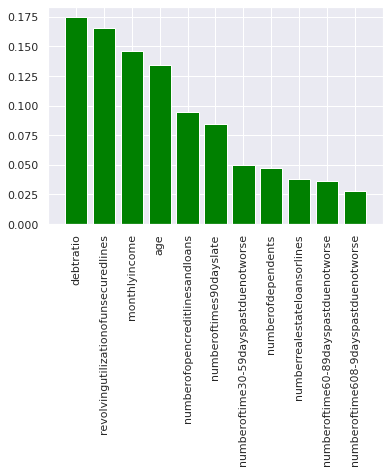

In [ ]:
plt.bar(X.columns[np.argsort(important)[::-1]] , important[indices], color="green", align="center" )
plt.xticks(rotation = 90 )
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
X.columns[np.argsort(important)[::-1]] 

Index(['debtratio', 'revolvingutilizationofunsecuredlines', 'monthlyincome',
       'age', 'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberoftime30-59dayspastduenotworse', 'numberofdependents',
       'numberrealestateloansorlines', 'numberoftime60-89dayspastduenotworse',
       'numberoftime608-9dayspastduenotworse'],
      dtype='object')

## Train and build baseline model

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , random_state = 0 , test_size = 0.23)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
knn = KNeighborsClassifier( n_neighbors = 5 , p = 2 , metric = 'minkowski' )
lr = LogisticRegression( penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100,multi_class='ovr', verbose=2 )
ab = AdaBoostClassifier( n_estimators = 200 , learning_rate = 1.0)
gb = GradientBoostingClassifier( n_estimators = 200 , learning_rate=0.1)
rf = RandomForestClassifier( n_estimators = 10 , max_depth = None , min_samples_split = 2 , min_samples_leaf = 1 ,random_state = 0 )

## Training our training set

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
lr.fit(x_train,y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=2,
                   warm_start=False)

In [ ]:
ab.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [ ]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Testing our models
## Using Mean Accuracy , and ROC - AUC Curve

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
knn.score(x_test,y_test)

0.9323681489141675

In [ ]:
roc_auc_score(y_test,knn.predict_proba(np.array(x_test.values))[:,1],average='macro')

0.5591166101163123

In [ ]:
lr.score(x_test,y_test)

0.9329886246122027

In [ ]:
test_labels=lr.predict_proba(np.array(x_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)


0.8485111106174911

In [ ]:
roc_auc_score(y_test,gb.predict_proba(np.array(x_test.values))[:,1] ,average='macro')

0.8590746485501914

In [ ]:
roc_auc_score(y_test,ab.predict_proba((x_test))[:,1] ,average='macro')

0.8505588628103213

In [ ]:
roc_auc_score(y_test,rf.predict_proba((x_test))[:,1] ,average='macro')

0.7680617817248876

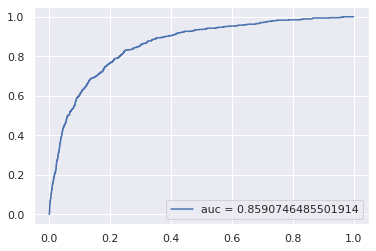

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,gb.predict_proba((x_test))[:,1])
plt.plot(fpr,tpr,label = 'auc = {0}'.format(roc_auc_score(y_test,gb.predict_proba(x_test)[:,1])))
plt.legend()
plt.show()

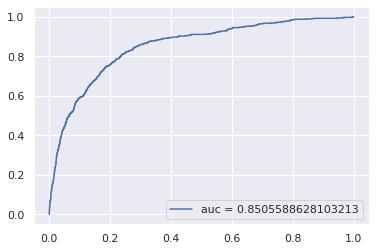

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,ab.predict_proba((x_test))[:,1])
plt.plot(fpr,tpr,label = 'auc = {0}'.format(roc_auc_score(y_test,ab.predict_proba(x_test)[:,1])))
plt.legend()
plt.show()

## Optimizing our model

#1 K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(gb, x_train, y_train,scoring='roc_auc',cv=5).mean()

0.8582995318976552

In [ ]:
# As kfold validation score is similar as our auc_score hence no overfitting problem to fix
from sklearn.model_selection import cross_val_score
cross_val_score(ab, x_train, y_train,scoring='roc_auc',cv=5).mean()

0.8461022576618522

#2 HyperParameter Tuning

In [ ]:
# On AdaBoosting and Gradient Boosting
from sklearn.model_selection import RandomizedSearchCV
parameters = {'n_estimators': [10,50,100]}
estimators = [ab,gb]
RSCV = list()
for i in range(2):
  RSCV.append(RandomizedSearchCV(estimator= estimators[i], param_distributions = parameters,n_iter = 5,scoring='roc_auc',verbose = 2).fit(x_train,y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.2s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.2s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.2s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.2s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.2s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   1.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   1.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   1.0s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   16.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.4s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.4s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.4s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.4s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.4s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   1.9s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   1.9s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   1.9s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   30.0s finished


In [ ]:
'for AdaBoosting best param = {0} & best score = {1} for GradientBoosting best param = {2} a& best score = {3}'.format(RSCV[0].best_params_, RSCV[0].best_score_ ,RSCV[1].best_params_, RSCV[1].best_score_ )

"for AdaBoosting best param = {'n_estimators': 50} & best score = 0.8498070680349809 for GradientBoosting best param = {'n_estimators': 100} a& best score = 0.8588747695653509"

Hence Training our Model with new HyperParameters in Gradient Boosting

## Feature Engineering

In [ ]:
# Handling Skewness
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
x_train_T = transformer.transform(x_train)

In [ ]:
gboostingUpdated = RSCV[1].best_estimator_.fit(x_train,y_train)

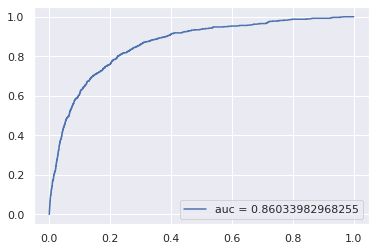

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, gboostingUpdated.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,label = 'auc = {0}'.format(roc_auc_score(y_test,gboostingUpdated.predict_proba(x_test)[:,1])))
plt.legend()
plt.show()

## Finally testing on our real testing dataSEt

In [ ]:
# Replacing - 
# Converting every Feature in small letter
test.rename(columns = {'Unnamed: 0':'ID'} , inplace = True)
test.columns = train.columns.str.lower()
AllColumns = [ column for column in test.columns ]
for c in AllColumns:
    if '-' in c:
        index = c.index('-')
        splitted = c[0:index] + c[index+1:len(c)]
        test.rename({c:splitted} , inplace = True)
#test.drop('ID' , inplace = True , axis = 1)
test.fillna((train.mean()) , inplace = True)
test.drop(['seriousdlqin2yrs'] , inplace = True , axis = 1)

In [ ]:
test

,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents,numberoftime608-9dayspastduenotworse
0,0.322174,0.885519,43.000000,0.000000,0.177513,5700.000000,4.00000,0.000000,0.000000,0.000000,0.000000
1,0.322174,0.463295,57.000000,0.000000,0.527237,9141.000000,15.00000,0.000000,4.000000,0.000000,2.000000
2,0.322174,0.043275,59.000000,0.000000,0.687648,5083.000000,12.00000,0.000000,1.000000,0.000000,2.000000
3,0.322174,0.280308,38.000000,1.000000,0.925961,3200.000000,7.00000,0.000000,2.000000,0.000000,0.000000
4,0.322174,1.000000,27.000000,0.000000,0.019917,3865.000000,4.00000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
42857,0.322174,0.000395,31.000000,0.000000,1060.000000,8.410442,5.00000,0.000000,1.000000,0.000000,0.000000
42858,0.322174,0.642353,49.000000,0.000000,712.000000,8.410442,8.00000,0.000000,0.000000,0.000000,1.000000
42859,0.322174,0.307214,53.000000,0.000000,0.503480,10200.000000,17.00000,0.000000,2.000000,0.000000,0.000000
42860,0.322174,0.090699,51.000000,0.000000,0.399641,16166.000000,17.00000,0.000000,2.000000,0.000000,3.000000


In [ ]:
predictedValue = RSCV[1].best_estimator_.predict(test)

In [ ]:
predictedValue


array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
Test_Labels_ANS = pd.DataFrame({'ID': test.index,'SeriousDlqin2yrs':predictedValue})

In [ ]:
Test_Labels_ANS

,ID,SeriousDlqin2yrs
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1
...,...,...
42857,42857,0
42858,42858,0
42859,42859,0
42860,42860,0


In [ ]:
from sklearn.externals import joblib
joblib.dump(RSCV[1],'Model.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Model.pkl']

In [ ]:
output.to_csv("./predictions_voting_Feature_transformation.csv", index=False)